In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


# Import and Modify Data_Set

### Import Data_Set and print head()

In [2]:
#import and split data_set 
fertilizer = pd.read_csv("Fertilizer_Prediction.csv")

print(fertilizer.dtypes,'\n')
print(fertilizer.columns,'\n')
print(fertilizer.head(),'\n')

Temparature         int64
Humidity            int64
Moisture            int64
Soil_Type          object
Crop_Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer_Name    object
dtype: object 

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer_Name'],
      dtype='object') 

   Temparature  Humidity   Moisture Soil_Type  Crop_Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer_Name  
0            0            Urea  
1           36             DAP  


### Convert 'String' into 'Numeric' value

In [3]:
from sklearn.preprocessing import LabelEncoder
encoderSoil = LabelEncoder()
encoderCrop = LabelEncoder()
fertilizer['Soil_Type'] = encoderSoil.fit_transform(fertilizer['Soil_Type'])
fertilizer['Crop_Type'] = encoderCrop.fit_transform(fertilizer['Crop_Type'])

# Print fertilizer head()
print(fertilizer.head())

# Print mapping for Soil_Type
soilMapping = {label: index for index, label in enumerate(encoderSoil.classes_)}
print(soilMapping)

# Print mapping for Crop_Type
cropMapping = {label: index for index, label in enumerate(encoderCrop.classes_)}
print(cropMapping)


   Temparature  Humidity   Moisture  Soil_Type  Crop_Type  Nitrogen  \
0           26         52        38          4          3        37   
1           29         52        45          2          8        12   
2           34         65        62          0          1         7   
3           32         62        34          3          9        22   
4           28         54        46          1          6        35   

   Potassium  Phosphorous Fertilizer_Name  
0          0            0            Urea  
1          0           36             DAP  
2          9           30        14-35-14  
3          0           20           28-28  
4          0            0            Urea  
{'Black': 0, 'Clayey': 1, 'Loamy': 2, 'Red': 3, 'Sandy': 4}
{'Barley': 0, 'Cotton': 1, 'Ground Nuts': 2, 'Maize': 3, 'Millets': 4, 'Oil seeds': 5, 'Paddy': 6, 'Pulses': 7, 'Sugarcane': 8, 'Tobacco': 9, 'Wheat': 10}


### Extract and Split Independent and Dependent variable

In [4]:
#Extracting independent and dependent variable  
x=fertilizer.iloc[:,[0,1,4,5,6,7]].values
y=fertilizer.iloc[:,8].values

# Splitting the dataset into training and test data_set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 2)

### Fit and Transform Data_Set

In [5]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()

x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

# Train & Test all Model

#### Initialize array to store accuracy and model

In [6]:
# initialize array to store accuracy and model
acc = []
model = []

## Decision Tree

#### Train & Test Model

In [7]:
#Import DecisionTree
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2, max_depth=5)

#### train model
DecisionTree.fit(x_train,y_train)

#### test model
predicted_values = DecisionTree.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predicted_values)
confusion_matrix = metrics.confusion_matrix(y_test, predicted_values)
#### store accuracy
acc.append(accuracy) # store accuracy
model.append('Decision Tree') # store model name

#### Print accuracy
print("DecisionTrees's Accuracy is: \n", accuracy*100, '%')
print("DecisionTrees's confusion Matrix is: \n", confusion_matrix)

DecisionTrees's Accuracy is: 
 85.0 %
DecisionTrees's confusion Matrix is: 
 [[0 3 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]


#### Print cross_val_score

In [8]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, x, y,cv=5)

print(score*100,'%')

[ 95. 100.  95.  95. 100.] %


#### Save Model

In [9]:
import pickle
model_name = 'DecisionTree.pkl'

Model_obj = open(model_name, 'wb') # open file
pickle.dump(DecisionTree, Model_obj) # Save model
Model_obj.close() # close file

## Guassian Naive Bayes

#### Train & Test Model

In [10]:
#### import model
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

#### train model
NaiveBayes.fit(x_train, y_train) 

#### test model
predicted_values = NaiveBayes.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predicted_values)
confusion_matrix = metrics.confusion_matrix(y_test, predicted_values)
#### store accuracy
acc.append(accuracy) # store accuracy
model.append('Guassian Naive Bayes') # store model name

#### Print accuracy
print("DecisionTrees's Accuracy is: \n", accuracy*100, '%')
print("DecisionTrees's confusion Matrix is: \n", confusion_matrix)

DecisionTrees's Accuracy is: 
 85.0 %
DecisionTrees's confusion Matrix is: 
 [[0 0 3 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]


#### Print cross_val_score

In [11]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes, x, y, cv=5)
print(score*100,'%')

[100. 100. 100. 100. 100.] %


#### Save Model

In [12]:
import pickle
model_name = 'NaiveBayes.pkl'

Model_obj = open(model_name, 'wb') # open file
pickle.dump(NaiveBayes, Model_obj) # Save model
Model_obj.close() # close file

## Support Vector Machine (SVM)

#### Train & Test Model

In [13]:
#### import model 
from sklearn.svm import SVC
SVM = SVC(gamma='auto')

#### train model
SVM.fit(x_train,y_train) 

#### test model
predicted_values = SVM.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predicted_values)
confusion_matrix = metrics.confusion_matrix(y_test, predicted_values)
#### store accuracy
acc.append(accuracy) # store accuracy
model.append('Guassian Naive Bayes') # store model name

#### Print accuracy
print("DecisionTrees's Accuracy is: \n", accuracy*100, '%')
print("DecisionTrees's confusion Matrix is: \n", confusion_matrix)

DecisionTrees's Accuracy is: 
 85.0 %
DecisionTrees's confusion Matrix is: 
 [[0 1 2 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]


#### Print cross_val_score

In [14]:
# Cross validation score (SVM)
score = cross_val_score(SVM, x, y, cv=5)
print(score*100,'%')

[65.         60.         65.         50.         57.89473684] %


#### Save Model

In [15]:
import pickle
model_name = 'SupportVectorMachine.pkl'

Model_obj = open(model_name, 'wb') # open file
pickle.dump(SVM, Model_obj) # Save model
Model_obj.close() # close file

## Logistic Regression

#### Train & Test Model

In [16]:
#### import model 
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)

#### train model
LogReg.fit(x_train,y_train) 

### test model
predicted_values = LogReg.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predicted_values)
confusion_matrix = metrics.confusion_matrix(y_test, predicted_values)

#### store accuracy
acc.append(accuracy) # store accuracy
model.append('Logistic Regression') # store model name

#### Print accuracy
print("DecisionTrees's Accuracy is: \n", accuracy*100, '%')
print("DecisionTrees's confusion Matrix is: \n", confusion_matrix)

DecisionTrees's Accuracy is: 
 90.0 %
DecisionTrees's confusion Matrix is: 
 [[1 2 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]


#### Print cross_val_score

In [17]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg, x, y, cv=5)

print(score*100,'%')

[100.         100.          95.         100.          94.73684211] %


#### Save Model

In [18]:
import pickle
model_name = 'LogisticRegression.pkl'

Model_obj = open(model_name, 'wb') # open file
pickle.dump(LogReg, Model_obj) # Save model
Model_obj.close() # close file

## Random Forest

#### Train & Test Model

In [19]:
#### import model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)

#### train model
RF.fit(x_train,y_train)

#### test model
predicted_values = RF.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predicted_values)
confusion_matrix = metrics.confusion_matrix(y_test, predicted_values)
#### store accuracy
acc.append(accuracy) # store accuracy
model.append('Random Forest') # store model name

#### Print accuracy
print("DecisionTrees's Accuracy is: \n", accuracy*100, '%')
print("DecisionTrees's confusion Matrix is: \n", confusion_matrix)

DecisionTrees's Accuracy is: 
 90.0 %
DecisionTrees's confusion Matrix is: 
 [[1 2 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]


#### Print cross_val_score

In [20]:
# Cross validation score (Random Forest)
score = cross_val_score(RF, x, y, cv=5)
print(score*100,'%')

[ 95. 100. 100. 100. 100.] %


#### Save Model

In [21]:
import pickle
model_name = 'RandomForest.pkl'

Model_obj = open(model_name, 'wb') # open file
pickle.dump(RF, Model_obj) # Save model
Model_obj.close() # close file

# Accuracy Comparison¶

Text(0, 0.5, 'Algorithm')

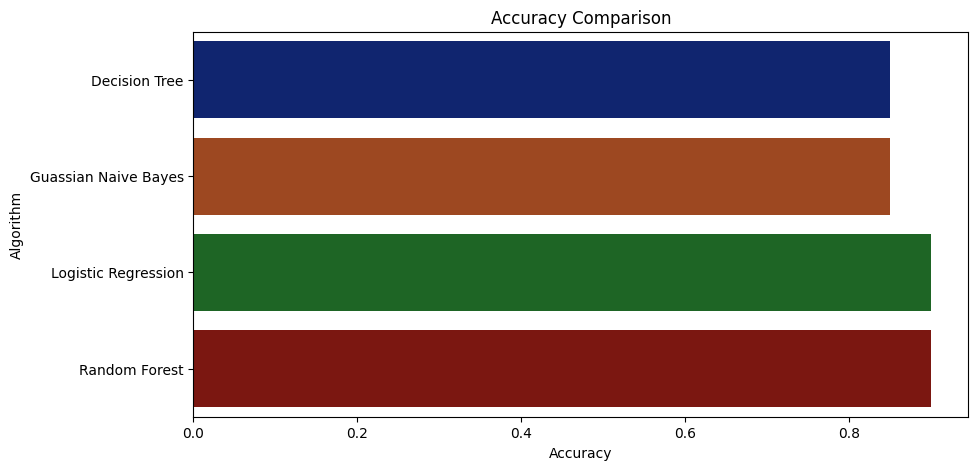

In [22]:
#Accuracy Comparison¶
plt.figure(figsize=[10,5],dpi = 100)

sns.barplot(x=acc, y=model, palette='dark')

plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')

In [23]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100,'%')

Decision Tree --> 85.0 %
Guassian Naive Bayes --> 85.0 %
Logistic Regression --> 90.0 %
Random Forest --> 90.0 %


# Custom prediction

In [24]:
#Making a prediction¶

# 25,50,7,24,0,19, 28-28

data = np.array([[25,50,7,24,0,19]])
prediction = RF.predict(data)
print(prediction)
prediction = DecisionTree.predict(data)
print(prediction)

['Urea']
['DAP']


In [25]:
print(fertilizer)

    Temparature  Humidity   Moisture  Soil_Type  Crop_Type  Nitrogen  \
0            26         52        38          4          3        37   
1            29         52        45          2          8        12   
2            34         65        62          0          1         7   
3            32         62        34          3          9        22   
4            28         54        46          1          6        35   
..          ...        ...       ...        ...        ...       ...   
94           25         50        32          1          7        24   
95           30         60        27          3          9         4   
96           38         72        51          2         10        39   
97           36         60        43          4          4        15   
98           29         58        57          0          8        12   

    Potassium  Phosphorous Fertilizer_Name  
0           0            0            Urea  
1           0           36             DAP  
